# 📏 Pixel to Centimeter Conversion Guide

Converting **pixels (px)** to **centimeters (cm)** is a straightforward process using a conversion factor based on screen DPI (Dots Per Inch).

---

## 🧩 Step-by-Step Guide

1. **Determine DPI (Dots Per Inch):**  
   Identify the DPI of your display or image.  
   The standard value for most screens is **96 DPI**.

2. **Use the Conversion Formula:**

   $$
   \text{cm} = \frac{\text{px}}{\text{DPI}} \times 2.54
   $$

   Where:
   - **px** = Number of pixels  
   - **DPI** = Dots per inch  
   - **2.54** = Centimeters per inch  

---

## 🧮 Example Calculation

For an image that is **1920 pixels wide** on a **96 DPI** screen:

$$
\text{cm} = \frac{1920}{96} \times 2.54 = 50.8 \, \text{cm}
$$

So, a 1920px wide image corresponds to approximately **50.8 cm**.

---

### 💡 Notes
- This conversion assumes a **fixed DPI**, which may differ between devices and images.  
- For more accurate real-world size detection (e.g., object measurement in computer vision), calibration with a **known reference object** is recommended.


## Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Sobel Edge Detection Method Only

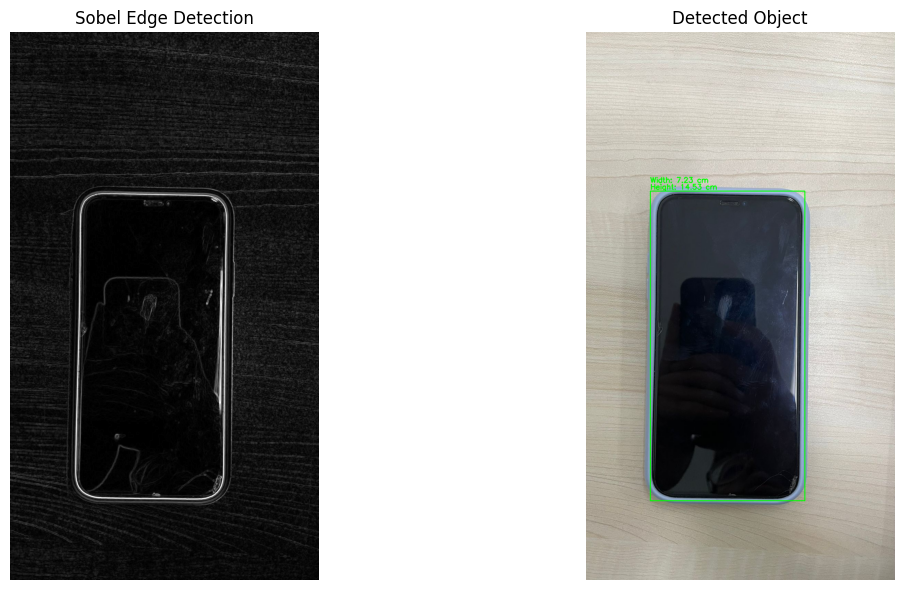

Lebar HP terdeteksi: 7.23 cm
Tinggi HP terdeteksi: 14.53 cm
Rasio konversi: 0.0161 cm/pixel


In [54]:
# Fungsi untuk menampilkan gambar side-by-side
def display_comparison(original_img, sobel_img, title1='Sobel Edge Detection', title2='Detected Object'):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    axs[0].imshow(cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')
    
    axs[1].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Membaca gambar
img = cv2.imread('assets/Image6.jpg')

# Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel edge detection
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Threshold agar lebih kontras
_, thresh = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)

# Cari kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Pastikan kontur ditemukan
if not contours:
    raise ValueError("Tidak ditemukan kontur pada citra HP.")

# Cari kontur terbesar (HP)
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Ukuran sebenarnya (cm)
actual_width_cm = 7.0
actual_height_cm = 15.0

# Hitung rasio cm/pixel
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2

# Konversi ukuran terdeteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg

# Gambar bounding box dan ukuran dalam cm
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Buat gambar Sobel dalam format 3 channel agar bisa ditampilkan dengan warna
sobel_vis = cv2.merge([sobel_combined, sobel_combined, sobel_combined])

# Tampilkan hasil Sobel dan deteksi bounding box secara berdampingan
display_comparison(img_box, sobel_vis)

# Cetak hasil akhir dalam cm
print(f"Lebar HP terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi HP terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")

## Object Contrast Adjustment (Third Party App)

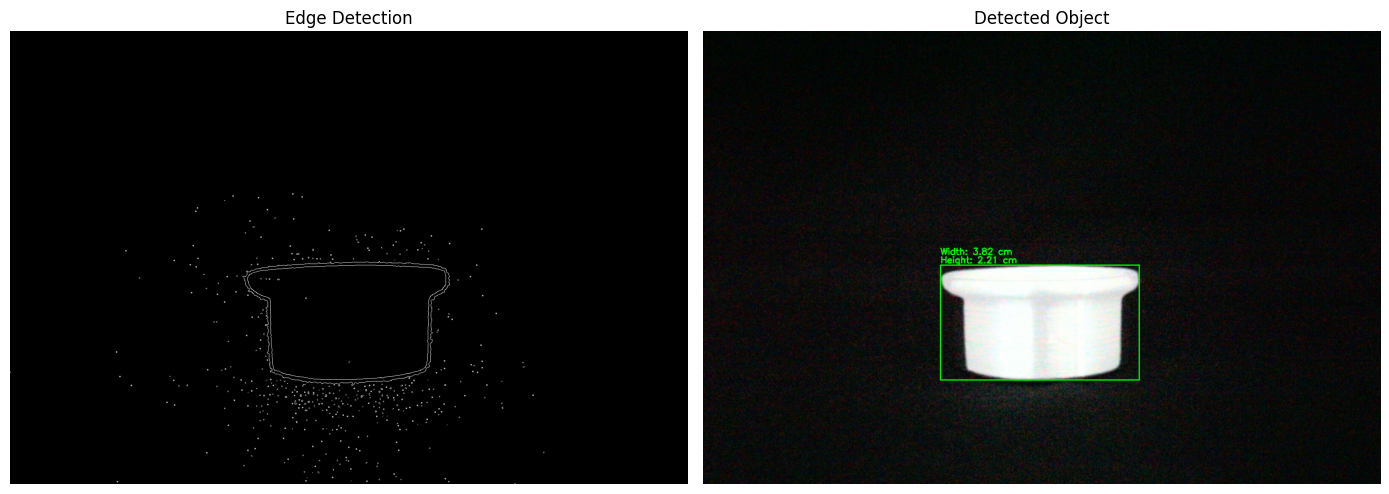

Lebar objek terdeteksi: 3.82 cm
Tinggi objek terdeteksi: 2.21 cm
Rasio konversi: 0.0081 cm/pixel


In [ ]:
# Fungsi untuk menampilkan gambar side-by-side
def display_comparison(original_img, edge_img, title1='Edge Detection', title2='Detected Object'):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axs[0].imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()

# === Membaca gambar ===
img = cv2.imread('assets/Image11.jpg')

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hilangkan noise
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Adaptive threshold untuk memperjelas kontras
thresh_adapt = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 15, 5)

# Gunakan morfologi untuk menutup celah kecil pada tepi
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh_adapt, cv2.MORPH_CLOSE, kernel, iterations=2)

# Canny edge detection
edges = cv2.Canny(morph, 50, 150)

# Cari kontur terbesar (diasumsikan objek utama)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if not contours:
    raise ValueError("Tidak ditemukan kontur pada citra objek.")
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Ukuran sebenarnya (dari HP untuk kalibrasi)
actual_width_cm = 4
actual_height_cm = 2.1

# Hitung rasio cm/pixel (gunakan data HP sebelumnya)
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2

# Konversi hasil deteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg

# Gambar bounding box
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Buat citra edge detection 3-channel
edges_vis = cv2.merge([edges, edges, edges])

# Tampilkan hasil berdampingan
display_comparison(img_box, edges_vis)

# Cetak hasil
print(f"Lebar objek terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi objek terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")

## Object Contrast Adjustment (Directly)

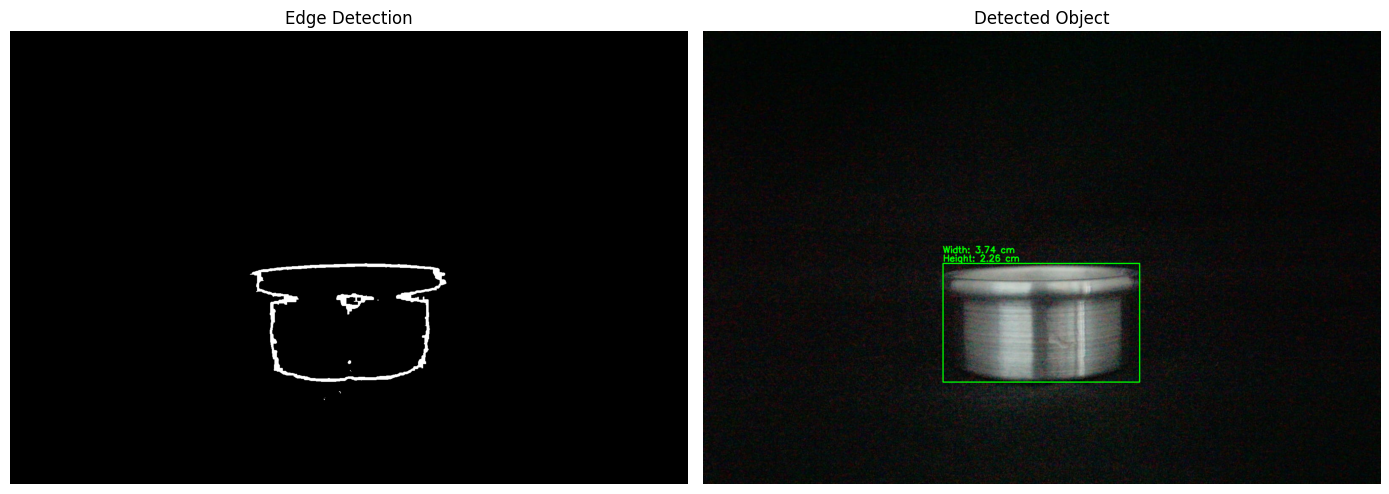

Lebar objek terdeteksi: 3.74 cm
Tinggi objek terdeteksi: 2.26 cm
Rasio konversi: 0.0081 cm/pixel


In [57]:
def display_comparison(original_img, edge_img, title1='Edge Detection', title2='Detected Object'):
    """Display image Edge Detection and Meassurement Detection using matplotlib.pyplot by matrix 1x2"""
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    axs[0].imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')
    
    axs[1].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()


# 1) LOAD IMAGE

img = cv2.imread('assets/Image10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 2) OBJECT SELECTION MASK (bright areas)

_, obj_mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)


# 3) CANVA-STYLE ADJUSTMENTS (applied only to object)

edited = img.astype(np.float32)
# Brightness +100
edited += 100
# Contrast -100  (flatten)
edited = edited * 0.5 + 64
# Clamp to valid range
edited = np.clip(edited, 0, 255).astype(np.uint8)
# Apply only to object
edited_obj = img.copy()
edited_obj[obj_mask == 255] = edited[obj_mask == 255]


# 4) EDGE DETECTION PIPELINE
gray2 = cv2.cvtColor(edited_obj, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray2, (9, 9), 0)
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = cv2.convertScaleAbs(sobel)
# Automatic threshold (OTSU)
_, thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Close gaps
kernel = np.ones((7, 7), np.uint8)
thresh_closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


# 5) FIND CONTOUR OF OBJECT
contours, _ = cv2.findContours(thresh_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    raise ValueError("Tidak ditemukan kontur pada objek.")

largest_contour = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(largest_contour)


# 6) MEASUREMENT (CM) - Real Meassure References for Scaling Calibration
actual_width_cm = 4.0
actual_height_cm = 2.1
# Hitung rasio cm/pixel
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2
# Konversi ukuran terdeteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg
# Gambar bounding box dan ukuran dalam cm
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
# Prepare edge image for display
edges_vis = cv2.merge([thresh_closed, thresh_closed, thresh_closed])

# 8) DISPLAY SIDE-BY-SIDE
display_comparison(img_box, edges_vis)

# 9) PRINT RESULTS
print(f"Lebar objek terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi objek terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")